<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L8-1_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **결정 트리 회귀 모델 훈련하기**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

boston = pd.read_csv('boston.csv')

features = boston.drop(columns = 'PRICE').iloc[:, 0:2]
target = boston['PRICE']

model = DecisionTreeRegressor(random_state=0)
model.fit(features, target)

DecisionTreeRegressor(random_state=0)

In [ ]:
observation = [[0.02, 16]]

model.predict(observation)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([33.])

## **결정 트리 분류 모델 훈련하기**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = DecisionTreeClassifier(random_state=0)
model.fit(features, target)

DecisionTreeClassifier(random_state=0)

In [ ]:
observation = [[5, 4, 3, 2]]

print(model.predict(observation))
print(model.predict_proba(observation))

[1]
[[0. 1. 0.]]


- criterion을 설정하여 다른 불순도를 사용하여 모델을 훈련시킬 수 있음

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state = 0)
model_entropy.fit(features, target)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
print(model_entropy.predict(observation))
print(model_entropy.predict_proba(observation))

[1]
[[0. 1. 0.]]


## **결정 트리 모델 시각화하기**

In [ ]:
!pip install graphviz

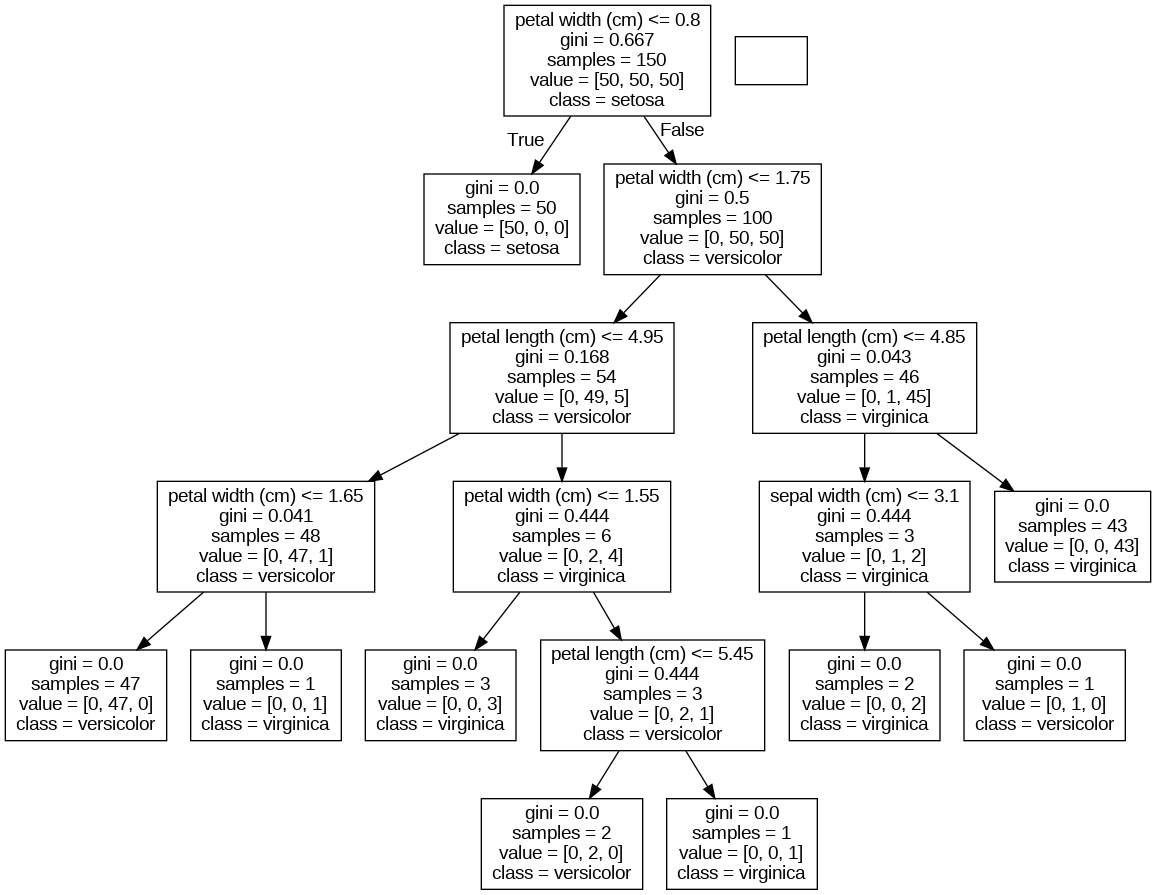

In [ ]:
# graphviz로 시각화하기

import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = DecisionTreeClassifier(random_state=0)
model.fit(features, target)

dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names = iris.feature_names, class_names=iris.target_names)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

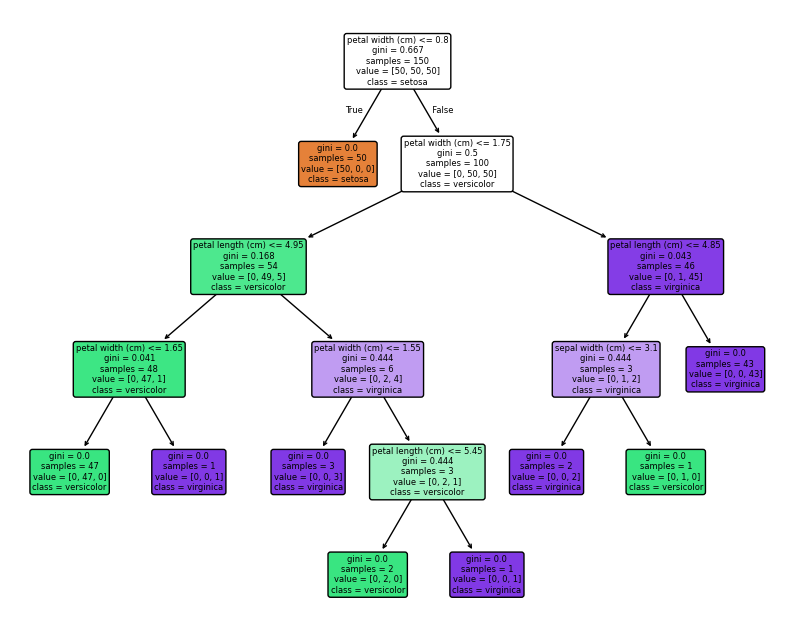

In [ ]:
# matplotlib으로 시각화하기

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = DecisionTreeClassifier(random_state=0)
model.fit(features, target)

plt.figure(figsize = (10, 8))
tree.plot_tree(model, filled = True,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True, fontsize=6)

plt.show()

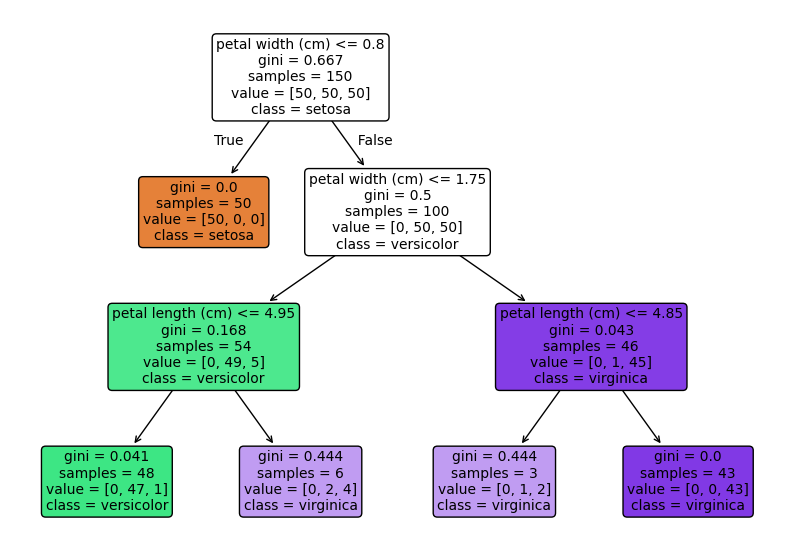

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
target = iris.target

model = DecisionTreeClassifier(random_state=0,
                               max_depth=3,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_leaf_nodes=None,
                               min_impurity_decrease=0)
model.fit(features, target)

plt.figure(figsize = (10, 7))
tree.plot_tree(model, filled = True,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               rounded=True, fontsize=10)

plt.show()

### **`titanic.csv` 파일을 불러오고, DecisionTreeClassifier 함수를 사용하여 Survived에 대한 결정 트리 분류 모델을 학습시킨 후 적절한 방법을 사용하여 시각화 해보시오.**

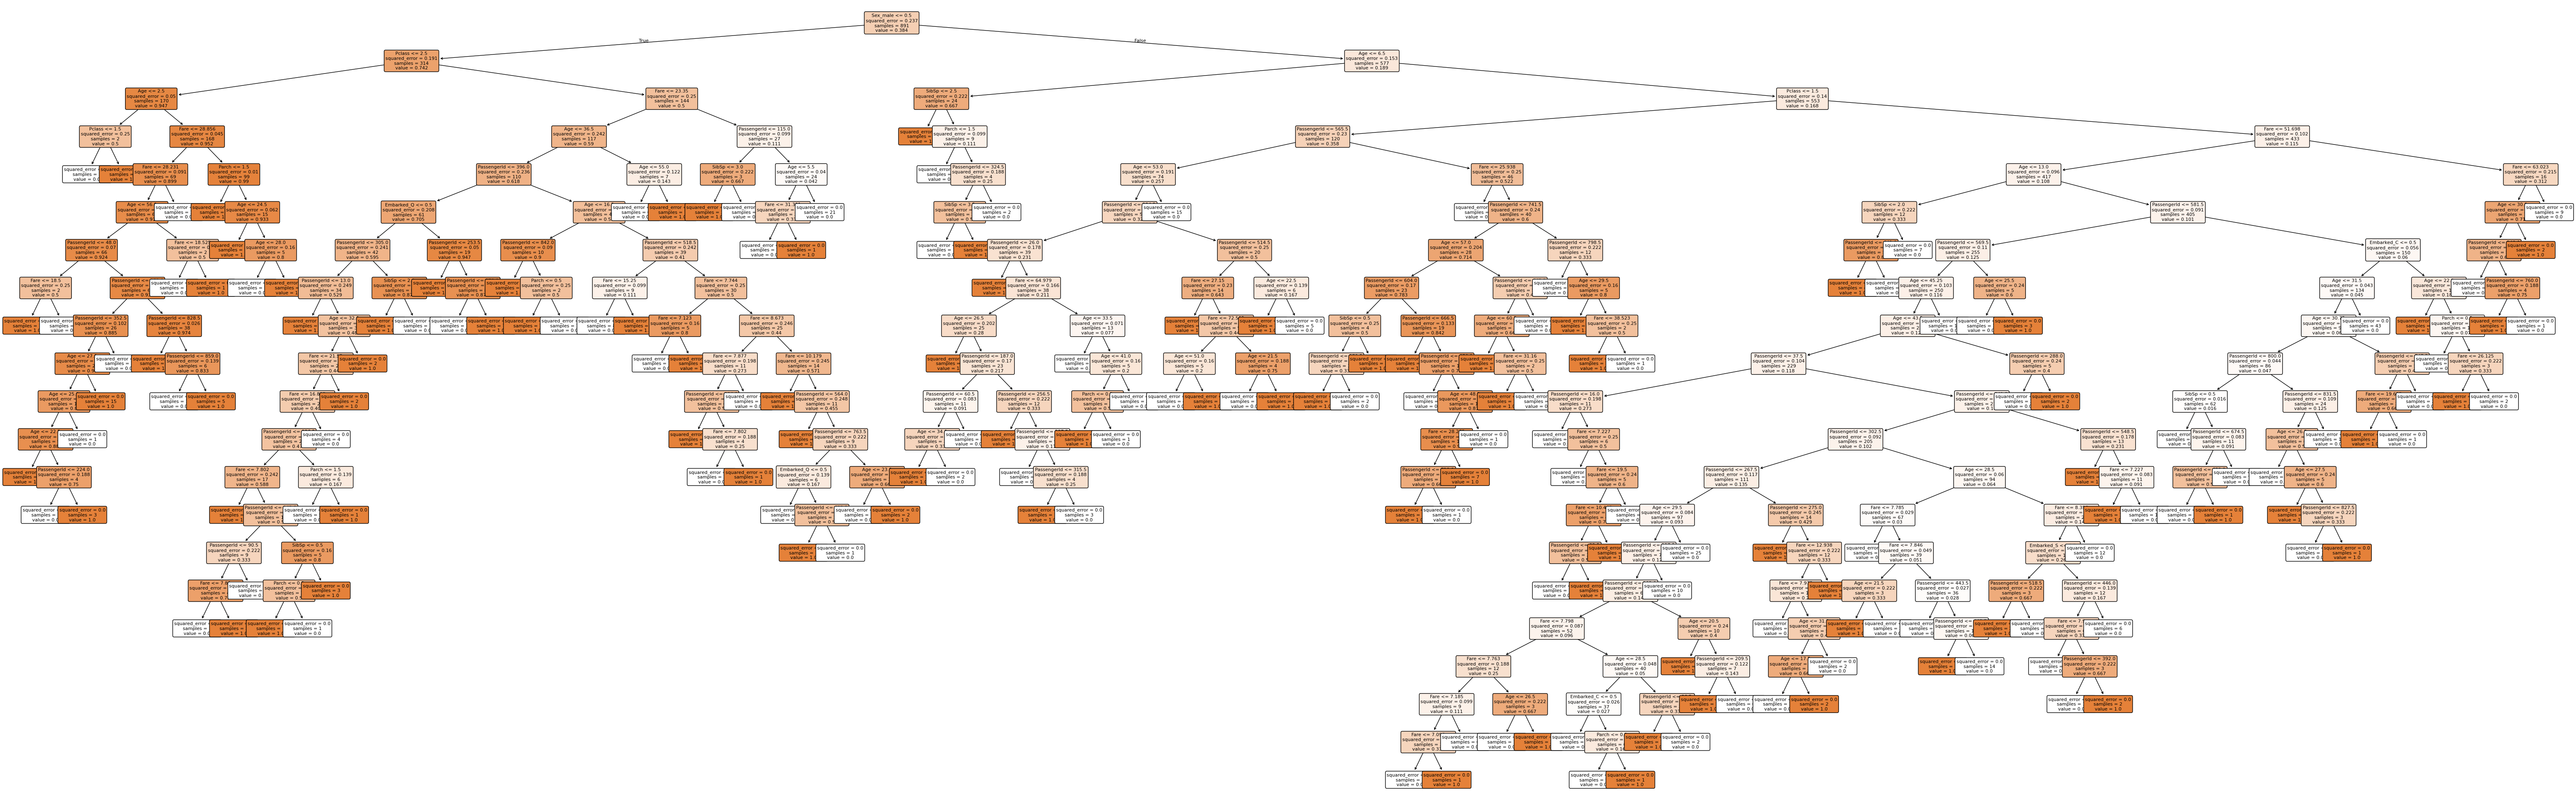

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

titanic = pd.read_csv('titanic.csv')

features = titanic.drop(columns = 'Survived')
target = titanic['Survived']

features = features.drop(columns=['Name', 'Ticket', 'Cabin'])

features_e = pd.get_dummies(features)

features_e = features_e.fillna(features_e.median(numeric_only=True))


model = DecisionTreeRegressor(random_state=0)
model.fit(features_e, target)

plt.figure(figsize = (80, 25))
tree.plot_tree(
    model,
    filled=True,
    feature_names=features_e.columns,
    class_names=["Died", "Survived"],
    rounded=True,
    fontsize=8
)

plt.show()